In [ ]:
# Imports generales
import pandas as pd
import re
import matplotlib.pyplot as plt

In [ ]:
df_estres = pd.read_csv('StressData.csv',sep=';')

In [ ]:
df_estres.head()

,Marca temporal,¿Cuántos años tienes?,¿Cuál es tu estado civil?,¿Cuál es tu género?,¿Cuál es tu nivel profesional?,¿Cuál es tu nivel educativo?,Actualmente ¿Consideras tener estrés?,¿Tienes síntomas asociados con el estrés? (Elegir el más recurrente),¿Has experimentado cambios en tu interacción social debido al estrés?,¿Cómo describirías la calidad de tu sueño?,¿Has notado cambios en tus hábitos alimenticios debido al estrés?,¿Hay cambios en tu nivel de actividad física?,¿Compartes tus preocupaciones y experiencias de estrés con amigos o familiares?,¿Cómo describirías tu red de apoyo social?,¿Qué estrategias utilizas para hacer frente al estrés?,¿Has notado cambios en tus estrategias de afrontamiento a lo largo del tiempo?,¿Cuál consideras las causas de tu estrés?
0,2/05/2024 11:50,62,Casado,Masculino,Trabajador Independiente,Maestría o doctorado,Si,Tensión muscular,"Sí, me he vuelto más introvertido/a",Regular,Sí,Si,Familia,Moderada,Pasear,Si,Problemas Familiares
1,2/05/2024 13:05,52,Casado,Femenino,Trabajador Independiente,Maestría o doctorado,Si,Tensión muscular,"No, no he experimentado cambios",Regular,No,No,Familia,Débil,Pasear,Sí,Problemas Familiares
2,3/05/2024 12:13,21,Soltero,Femenino,Estudiante,Universitario,Si,Tensión muscular,"Sí, me he vuelto más introvertido/a",Regular,Sí,No,Amigos,Débil,Organización,No he tenido estrategias.,Trabajos de Universidad
3,3/05/2024 12:14,20,Soltero,Masculino,Estudiante,Universitario,Si,Dolor de cabeza,"No, no he experimentado cambios",Mala,Sí,Si,Amigos,Moderada,Deportes,Si,Problemas Familiares
4,3/05/2024 12:15,20,Soltero,Masculino,Estudiante,Universitario,Si,Tensión muscular,"Sí, me he vuelto más introvertido/a",Mala,Sí,Si,Amigos,Débil,Música,Si,Trabajos de Universidad


In [ ]:
#Se elimina la columna, ya que es la fecha de llenado de encuesta por defecto de Google Forms y no aporta al trabajo investigativo.
df_estres.drop("Marca temporal", axis=1, inplace=True)

In [ ]:
#Se renombra todas las columnas de pregunta de encuesta a nombres de variables para el uso futuro del modelo.
df_estres.rename(columns={
    "¿Cuántos años tienes? ": "Edad",
    "¿Cuál es tu estado civil?": "Estado civil",
    "¿Cuál es tu género?": "Género",
    "¿Cuál es tu nivel profesional?": "Nivel profesional",
    "¿Cuál es tu nivel educativo?": "Nivel educativo",
    "Actualmente ¿Consideras tener estrés?": "Estrés",
    "¿Tienes síntomas asociados con el estrés? (Elegir el más recurrente)": "Síntomas de estrés",
    "¿Has experimentado cambios en tu interacción social debido al estrés?": "Interacción social",
    "¿Cómo describirías la calidad de tu sueño?": "Calidad del sueño",
    "¿Has notado cambios en tus hábitos alimenticios debido al estrés?": "Cambios alimenticios",
    "¿Hay cambios en tu nivel de actividad física?": "Actividad física",
    "¿Compartes tus preocupaciones y experiencias de estrés con amigos o familiares?": "Apoyo social",
    "¿Cómo describirías tu red de apoyo social?": "Red de apoyo",
    "¿Qué estrategias utilizas para hacer frente al estrés?": "Estrategias de afrontamiento",
    "¿Has notado cambios en tus estrategias de afrontamiento a lo largo del tiempo?": "Cambio en estrategias",
    "¿Cuál consideras las causas de tu estrés?": "Causas del estrés"
}, inplace=True)

In [ ]:
#Vistazos generales de como va el dataset.
df_estres.head()
df_estres.info()
df_estres.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Edad                          300 non-null    object
 1   Estado civil                  300 non-null    object
 2   Género                        300 non-null    object
 3   Nivel profesional             300 non-null    object
 4   Nivel educativo               300 non-null    object
 5   Estrés                        300 non-null    object
 6   Síntomas de estrés            300 non-null    object
 7   Interacción social            300 non-null    object
 8   Calidad del sueño             300 non-null    object
 9   Cambios alimenticios          300 non-null    object
 10  Actividad física              300 non-null    object
 11  Apoyo social                  300 non-null    object
 12  Red de apoyo                  300 non-null    object
 13  Estrategias de afron

,Edad,Estado civil,Género,Nivel profesional,Nivel educativo,Estrés,Síntomas de estrés,Interacción social,Calidad del sueño,Cambios alimenticios,Actividad física,Apoyo social,Red de apoyo,Estrategias de afrontamiento,Cambio en estrategias,Causas del estrés
count,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300
unique,54,4,4,5,3,2,5,2,3,2,2,4,3,16,62,9
top,20,Soltero,Femenino,Estudiante,Universitario,Si,Dolor de cabeza,"No, no he experimentado cambios",Regular,Sí,Si,Familia,Moderada,Relajación,Si,Problemas Económicos
freq,38,243,159,209,262,257,122,165,194,209,226,120,200,74,63,101


In [ ]:
# Algunas respuestas pusieron edad + "años", es por ello que eliminamos todo excepto los números
df_estres['Edad'] = df_estres['Edad'].str.extract('(\d+)').astype(int)

In [ ]:
df_estres["Edad"] = pd.to_numeric(df_estres["Edad"], errors='coerce')

In [ ]:
#Agregamos margenes para clasificar las edades en categorias y sea facil ver los grupos a donde pertenecen.
bins = [0, 25, 35, 45, 60, 100]
labels = ["Menos de 25", "25-35", "36-45", "46-60", "Más de 60"]

In [ ]:
df_estres["Edad"] = pd.cut(df_estres["Edad"], bins=bins, labels=labels, right=False)

In [ ]:
print(df_estres.head())

          Edad Estado civil     Género         Nivel profesional  \
0    Más de 60       Casado  Masculino  Trabajador Independiente   
1        46-60       Casado   Femenino  Trabajador Independiente   
2  Menos de 25      Soltero   Femenino                Estudiante   
3  Menos de 25      Soltero  Masculino                Estudiante   
4  Menos de 25      Soltero  Masculino                Estudiante   

        Nivel educativo Estrés Síntomas de estrés  \
0  Maestría o doctorado     Si   Tensión muscular   
1  Maestría o doctorado     Si   Tensión muscular   
2         Universitario     Si   Tensión muscular   
3         Universitario     Si    Dolor de cabeza   
4         Universitario     Si   Tensión muscular   

                    Interacción social Calidad del sueño Cambios alimenticios  \
0  Sí, me he vuelto más introvertido/a           Regular                   Sí   
1      No, no he experimentado cambios           Regular                   No   
2  Sí, me he vuelto más intro

In [ ]:
df_estres["Interacción social"] = df_estres["Interacción social"].apply(lambda x: x.split(",")[0])

In [ ]:
df_estres.head()

,Edad,Estado civil,Género,Nivel profesional,Nivel educativo,Estrés,Síntomas de estrés,Interacción social,Calidad del sueño,Cambios alimenticios,Actividad física,Apoyo social,Red de apoyo,Estrategias de afrontamiento,Cambio en estrategias,Causas del estrés
0,Más de 60,Casado,Masculino,Trabajador Independiente,Maestría o doctorado,Si,Tensión muscular,Sí,Regular,Sí,Si,Familia,Moderada,Pasear,Si,Problemas Familiares
1,46-60,Casado,Femenino,Trabajador Independiente,Maestría o doctorado,Si,Tensión muscular,No,Regular,No,No,Familia,Débil,Pasear,Sí,Problemas Familiares
2,Menos de 25,Soltero,Femenino,Estudiante,Universitario,Si,Tensión muscular,Sí,Regular,Sí,No,Amigos,Débil,Organización,No he tenido estrategias.,Trabajos de Universidad
3,Menos de 25,Soltero,Masculino,Estudiante,Universitario,Si,Dolor de cabeza,No,Mala,Sí,Si,Amigos,Moderada,Deportes,Si,Problemas Familiares
4,Menos de 25,Soltero,Masculino,Estudiante,Universitario,Si,Tensión muscular,Sí,Mala,Sí,Si,Amigos,Débil,Música,Si,Trabajos de Universidad


In [ ]:
# Hacemos lo mismo como el caso anterior pero esta vez con la columna de si los cambios de habitos le funcionaron o no.
categorias_cambios = {
    'Sí': r'\b(s[ií])\b|sí|sii|si\b|más|Siempre|mejorado|me pasa',
    'No': r'\b(no|ninguna)\b|ningún',
    'Poco': r'\balgo|poco|muy poco|un poco|aveces|ciertos cambios',
    'Sí': r'.*'
}

# Función para categorizar las respuestas
def categorizar_cambios(respuesta):
    for categoria, patron in categorias_cambios.items():
        if re.search(patron, respuesta, re.IGNORECASE):
            return categoria
    return 'Otros2'

# Aplicamos la función a la columna
df_estres['Cambio en estrategias'] = df_estres['Cambio en estrategias'].apply(categorizar_cambios)

# Vemos
print(df_estres.head())



          Edad Estado civil     Género         Nivel profesional  \
0    Más de 60       Casado  Masculino  Trabajador Independiente   
1        46-60       Casado   Femenino  Trabajador Independiente   
2  Menos de 25      Soltero   Femenino                Estudiante   
3  Menos de 25      Soltero  Masculino                Estudiante   
4  Menos de 25      Soltero  Masculino                Estudiante   

        Nivel educativo Estrés Síntomas de estrés Interacción social  \
0  Maestría o doctorado     Si   Tensión muscular                 Sí   
1  Maestría o doctorado     Si   Tensión muscular                 No   
2         Universitario     Si   Tensión muscular                 Sí   
3         Universitario     Si    Dolor de cabeza                 No   
4         Universitario     Si   Tensión muscular                 Sí   

  Calidad del sueño Cambios alimenticios Actividad física Apoyo social  \
0           Regular                   Sí               Si      Familia   
1         

In [ ]:

# Contar las filas categorizadas como 'Otros'
total_otros2 = df_estres[df_estres['Cambio en estrategias'] == 'Otros2'].shape[0]

# Mostrar el total
print("Total de respuestas categorizadas como 'Otros':", total_otros2)


Total de respuestas categorizadas como 'Otros': 0


In [ ]:
df_estres['Estrés'] = df_estres['Estrés'].apply(lambda x: 1 if x == 'Si' else 0)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Crear un LabelEncoder
le = LabelEncoder()

# Ajustar y transformar los datos
df_estres['Edad'] = le.fit_transform(df_estres['Edad'])
df_estres['Estado civil'] = le.fit_transform(df_estres['Estado civil'])
df_estres['Género'] = le.fit_transform(df_estres['Género'])
df_estres['Nivel profesional'] = le.fit_transform(df_estres['Nivel profesional'])
df_estres['Nivel educativo'] = le.fit_transform(df_estres['Nivel educativo'])
df_estres['Causas del estrés'] = le.fit_transform(df_estres['Causas del estrés'])

In [ ]:
# Exportar los resultados a un archivo Excel
df_estres.to_excel('df_estres.xlsx', index=False)

In [ ]:
# Variables independientes
X = df_estres[['Edad', 'Estado civil', 'Género', 'Nivel profesional', 'Nivel educativo', 'Causas del estrés']]

# Variable dependiente
y = df_estres['Estrés']

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [ ]:
#from imblearn.over_sampling import SMOTE

# Aplicar SMOTE al conjunto de entrenamiento
#smote = SMOTE(random_state=42)
#X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definir el modelo
rf = RandomForestClassifier(random_state=42)

# Definir la búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar la búsqueda de hiperparámetros con GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Best hyperparameters:")
print(best_params)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluar el modelo con los mejores hiperparámetros en el conjunto de validación
best_rf = grid_search.best_estimator_
y_val_pred = best_rf.predict(X_val)


print("Validation Set Evaluation")
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

# Evaluar el modelo con los mejores hiperparámetros en el conjunto de prueba
y_test_pred = best_rf.predict(X_test)
print("Test Set Evaluation")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

Validation Set Evaluation
Confusion Matrix:
[[ 0  8]
 [ 2 50]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.86      0.96      0.91        52

    accuracy                           0.83        60
   macro avg       0.43      0.48      0.45        60
weighted avg       0.75      0.83      0.79        60

Test Set Evaluation
Confusion Matrix:
[[ 0  9]
 [ 1 50]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.85      0.98      0.91        51

    accuracy                           0.83        60
   macro avg       0.42      0.49      0.45        60
weighted avg       0.72      0.83      0.77        60



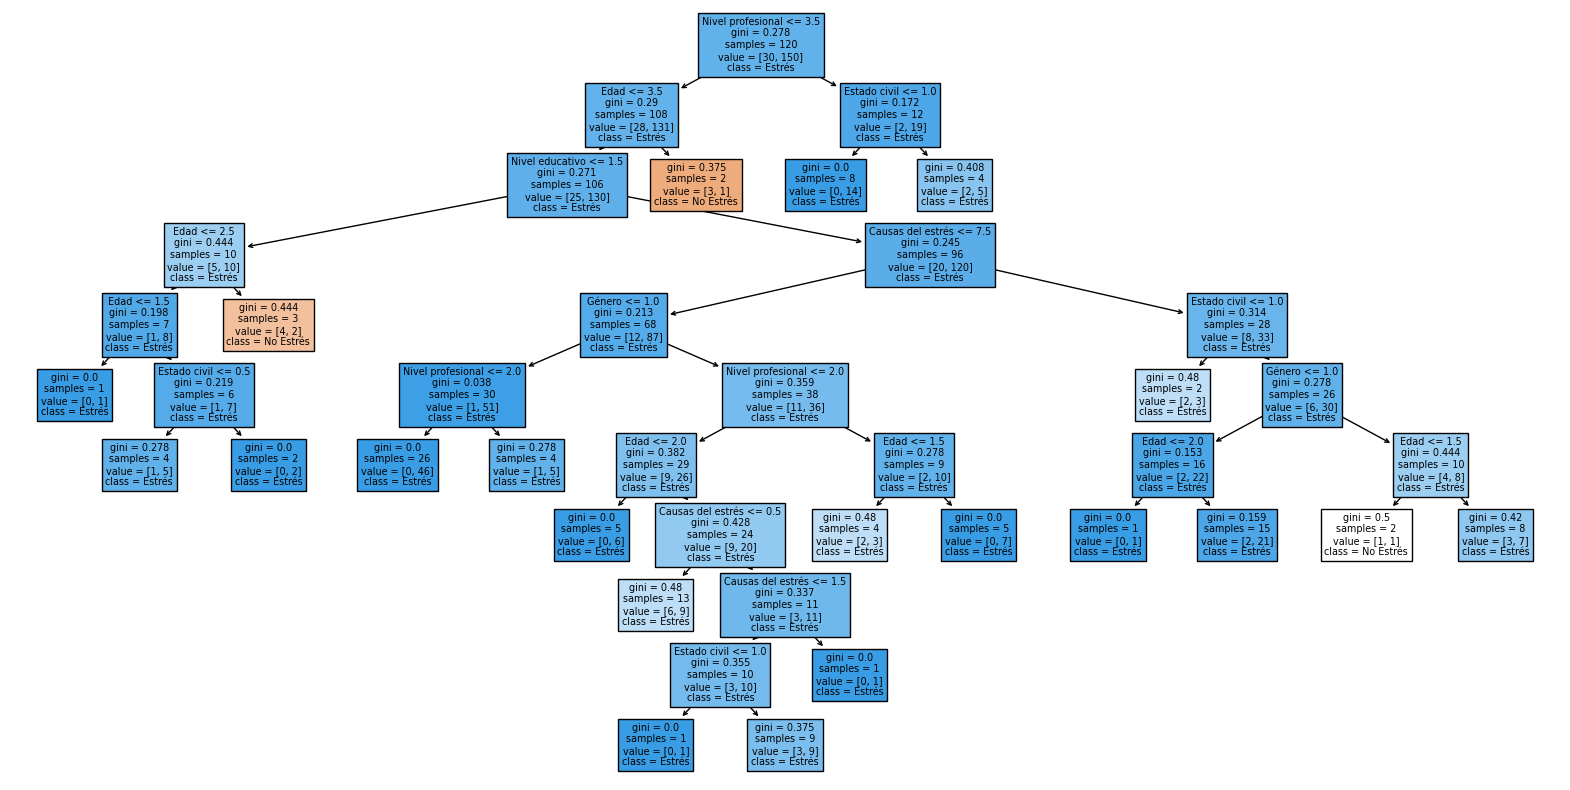

In [ ]:
from sklearn.tree import plot_tree
# Seleccionamos un árbol del bosque
estimator = best_rf.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(estimator, feature_names=X.columns, class_names=['No Estrés', 'Estrés'], filled=True)
plt.show()

In [ ]:
df_estres.head(5)

,Edad,Estado civil,Género,Nivel profesional,Nivel educativo,Estrés,Síntomas de estrés,Interacción social,Calidad del sueño,Cambios alimenticios,Actividad física,Apoyo social,Red de apoyo,Estrategias de afrontamiento,Cambio en estrategias,Causas del estrés
0,4,0,2,4,0,1,Tensión muscular,Sí,Regular,Sí,Si,Familia,Moderada,Pasear,Sí,1
1,2,0,0,4,0,1,Tensión muscular,No,Regular,No,No,Familia,Débil,Pasear,Sí,1
2,3,2,0,1,2,1,Tensión muscular,Sí,Regular,Sí,No,Amigos,Débil,Organización,Sí,8
3,3,2,2,1,2,1,Dolor de cabeza,No,Mala,Sí,Si,Amigos,Moderada,Deportes,Sí,1
4,3,2,2,1,2,1,Tensión muscular,Sí,Mala,Sí,Si,Amigos,Débil,Música,Sí,8


In [ ]:
# Definir las variables independientes para el segundo modelo
X2 = df_estres[['Interacción social', 'Calidad del sueño', 'Cambios alimenticios', 'Actividad física']]

# Variable dependiente para el segundo modelo
y2 = df_estres['Síntomas de estrés']

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Model 2 - Validation Set Evaluation
Confusion Matrix:
[[14  3  0  0  7]
 [ 7  0  0  0  3]
 [ 1  0  0  0  2]
 [ 3  0  0  0  0]
 [12  2  0  0  6]]

Classification Report:
                            precision    recall  f1-score   support

           Dolor de cabeza       0.38      0.58      0.46        24
  Hambre o Deseo por comer       0.00      0.00      0.00        10
Llenura o Falta de Apetito       0.00      0.00      0.00         3
No presento ningún síntoma       0.00      0.00      0.00         3
          Tensión muscular       0.33      0.30      0.32        20

                  accuracy                           0.33        60
                 macro avg       0.14      0.18      0.15        60
              weighted avg       0.26      0.33      0.29        60

Model 2 - Test Set Evaluation
Confusion Matrix:
[[18  1  0  0  6]
 [ 5  0  0  0  5]
 [ 1  0  0  0  1]
 [ 2  1  0  0  1]
 [17  1  0  0  1]]

Classification

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

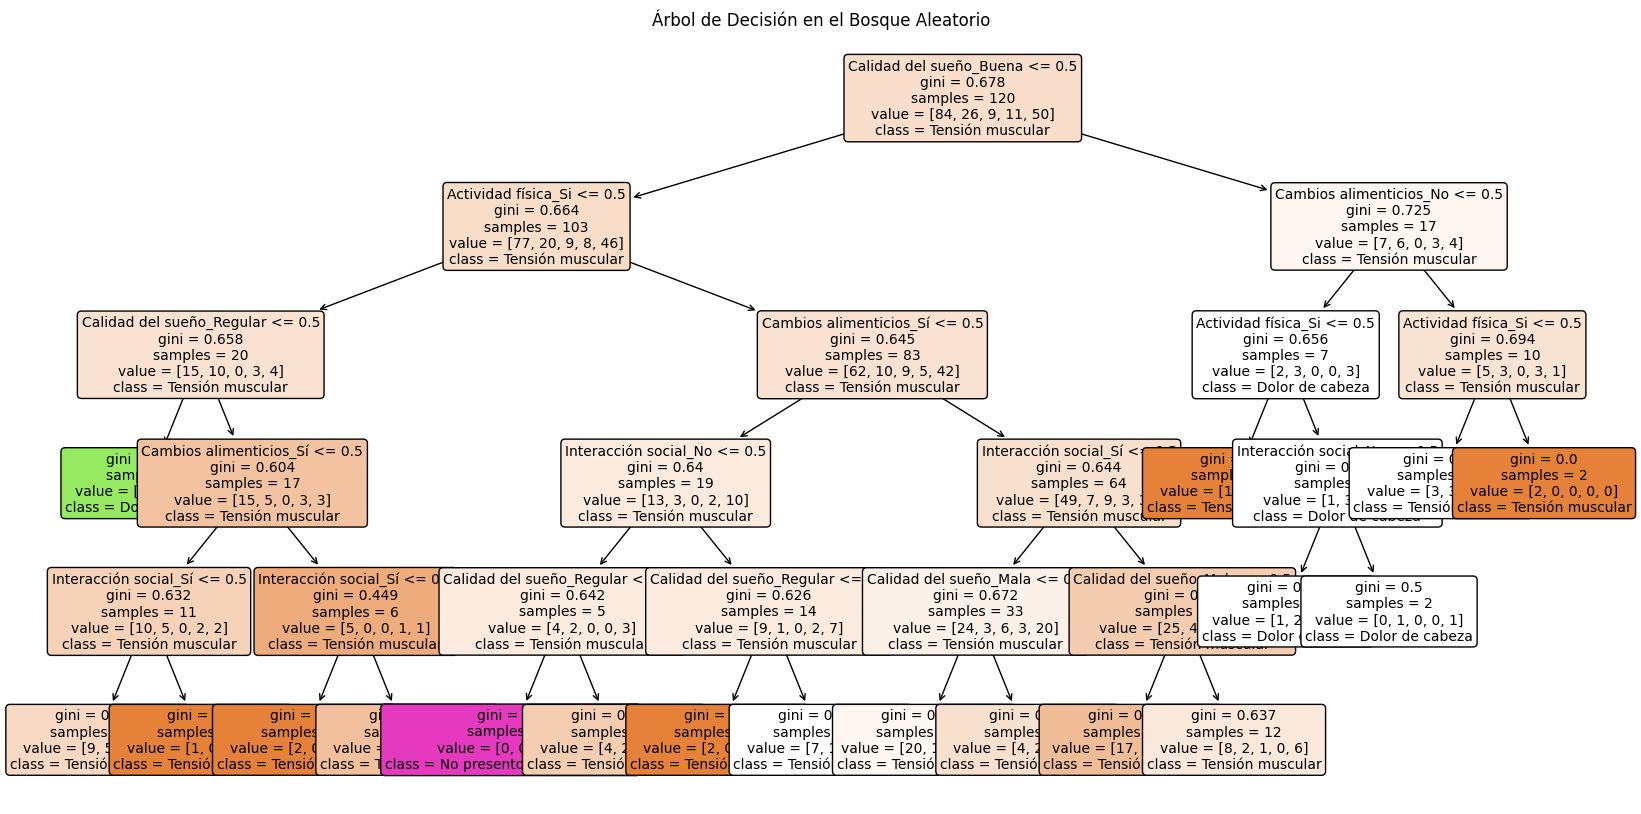

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Definir las variables independientes para el segundo modelo
X2 = df_estres[['Interacción social', 'Calidad del sueño', 'Cambios alimenticios', 'Actividad física']]

# Variable dependiente para el segundo modelo
y2 = df_estres['Síntomas de estrés']

# Dividir el conjunto de datos en entrenamiento, validación y prueba para el segundo modelo
X2_train, X2_temp, y2_train, y2_temp = train_test_split(X2, y2, test_size=0.4, random_state=42, stratify=y2)
X2_val, X2_test, y2_val, y2_test = train_test_split(X2_temp, y2_temp, test_size=0.5, random_state=42, stratify=y2_temp)

# Definir el preprocesador para las variables categóricas
categorical_features = ['Interacción social', 'Calidad del sueño', 'Cambios alimenticios', 'Actividad física']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

# Crear el pipeline con el preprocesador y el modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Definir la búsqueda de hiperparámetros para el pipeline
param_grid2 = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Configurar la búsqueda de hiperparámetros con GridSearchCV
grid_search2 = GridSearchCV(estimator=pipeline, param_grid=param_grid2, cv=5, n_jobs=-1, verbose=2)
grid_search2.fit(X2_train, y2_train)

# Evaluar el modelo en el conjunto de validación
y2_val_pred = grid_search2.best_estimator_.predict(X2_val)
print("Model 2 - Validation Set Evaluation")
print("Confusion Matrix:")
print(confusion_matrix(y2_val, y2_val_pred))
print("\nClassification Report:")
print(classification_report(y2_val, y2_val_pred))

# Evaluar el modelo en el conjunto de prueba
y2_test_pred = grid_search2.best_estimator_.predict(X2_test)
print("Model 2 - Test Set Evaluation")
print("Confusion Matrix:")
print(confusion_matrix(y2_test, y2_test_pred))
print("\nClassification Report:")
print(classification_report(y2_test, y2_test_pred))

# Visualizar uno de los árboles del bosque
plt.figure(figsize=(20, 10))
feature_names = grid_search2.best_estimator_.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_features)
plot_tree(grid_search2.best_estimator_.named_steps['classifier'].estimators_[0], feature_names=feature_names, class_names=y2.unique().astype(str), filled=True, rounded=True, fontsize=10)
plt.title("Árbol de Decisión en el Bosque Aleatorio")
plt.show()


Categorías con menos de 2 ejemplos:
Series([], Name: count, dtype: int64)
Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Model 3 - Validation Set Evaluation
Confusion Matrix:
[[ 0  0  0  0  0  1  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  6  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  3  0  0  0  0  0  5  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  5  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  2  0  0  0  0  0 15  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0]]

Classification Report:
                  precision    recall  f1-score   support

        Deportes       0.00      0.00      0.00         2
       Deportes        0.00      0.00      0.00         2
      Ejercicios       0.00      0.00      0.00         3
 Entretenimiento       0.00      0.00      0.00         8
Entretenimiento        0.00      0.00      0.00         1
         Hobbies       0.2

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

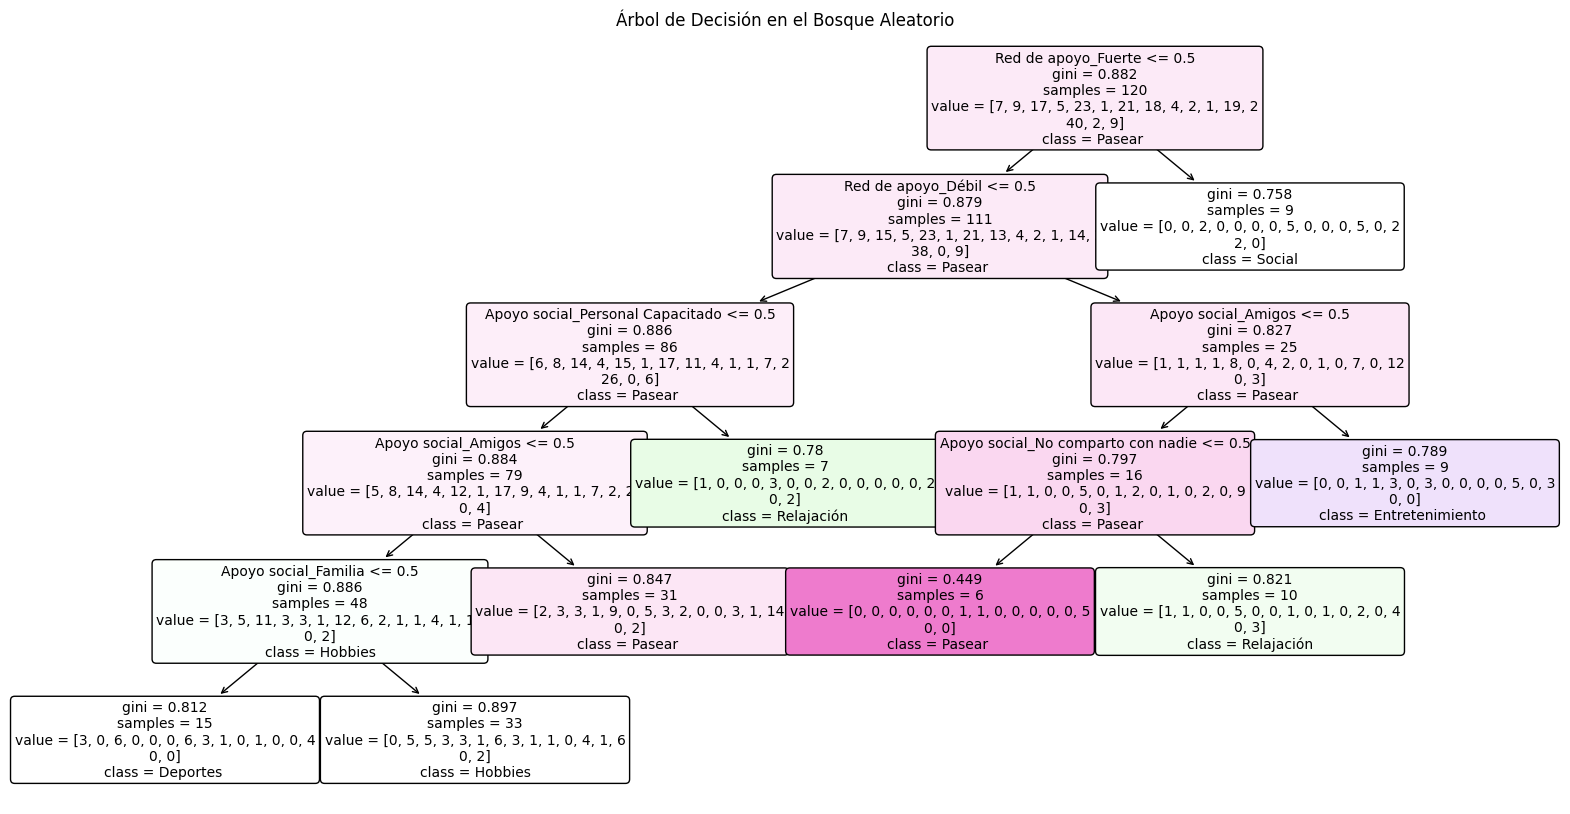

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Definir las variables independientes para el tercer modelo
X3 = df_estres[['Apoyo social', 'Red de apoyo', 'Cambio en estrategias']]

# Variable dependiente para el tercer modelo
y3 = df_estres['Estrategias de afrontamiento']

# Verificar la distribución de la variable objetivo
y3_distribution = y3.value_counts()

# Imprimir categorías con menos de 2 ejemplos
print("Categorías con menos de 2 ejemplos:")
print(y3_distribution[y3_distribution < 2])

# Si alguna categoría tiene menos de 2 ejemplos, no usamos 'stratify'
use_stratify = all(y3_distribution >= 2)

if use_stratify:
    X3_train, X3_temp, y3_train, y3_temp = train_test_split(X3, y3, test_size=0.4, random_state=42, stratify=y3)
else:
    print("No se usará 'stratify' porque algunas categorías tienen menos de 2 ejemplos.")
    X3_train, X3_temp, y3_train, y3_temp = train_test_split(X3, y3, test_size=0.4, random_state=42)

# En la segunda división, no utilizamos 'stratify'
X3_val, X3_test, y3_val, y3_test = train_test_split(X3_temp, y3_temp, test_size=0.5, random_state=42)

# Definir el preprocesador para las variables categóricas
categorical_features = ['Apoyo social', 'Red de apoyo', 'Cambio en estrategias']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

# Crear el pipeline con el preprocesador y el modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Definir la búsqueda de hiperparámetros para el pipeline
param_grid3 = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Configurar la búsqueda de hiperparámetros con GridSearchCV
grid_search3 = GridSearchCV(estimator=pipeline, param_grid=param_grid3, cv=5, n_jobs=-1, verbose=2)
grid_search3.fit(X3_train, y3_train)

# Evaluar el modelo en el conjunto de validación
y3_val_pred = grid_search3.best_estimator_.predict(X3_val)
print("Model 3 - Validation Set Evaluation")
print("Confusion Matrix:")
print(confusion_matrix(y3_val, y3_val_pred))
print("\nClassification Report:")
print(classification_report(y3_val, y3_val_pred))

# Evaluar el modelo en el conjunto de prueba
y3_test_pred = grid_search3.best_estimator_.predict(X3_test)
print("Model 3 - Test Set Evaluation")
print("Confusion Matrix:")
print(confusion_matrix(y3_test, y3_test_pred))
print("\nClassification Report:")
print(classification_report(y3_test, y3_test_pred))

# Visualizar uno de los árboles del bosque
plt.figure(figsize=(20, 10))
feature_names = grid_search3.best_estimator_.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_features)
plot_tree(grid_search3.best_estimator_.named_steps['classifier'].estimators_[0], feature_names=feature_names, class_names=y3.unique().astype(str), filled=True, rounded=True, fontsize=10)
plt.title("Árbol de Decisión en el Bosque Aleatorio")
plt.show()


In [ ]:
import pandas as pd

# Suponiendo que los datos están en un DataFrame llamado df
# Veamos la distribución de las variables

# Distribución de la variable 'Apoyo social'
print(df_estres['Apoyo social'].value_counts())

# Distribución de la variable 'Red de apoyo'
print(df_estres['Red de apoyo'].value_counts())

# Análisis de la efectividad de las estrategias según 'Apoyo social'
effectiveness_by_social_support = pd.crosstab(df_estres['Apoyo social'], df_estres['Cambio en estrategias'], normalize='index')
print(effectiveness_by_social_support)

# Análisis de la efectividad de las estrategias según 'Red de apoyo'
effectiveness_by_support_network = pd.crosstab(df_estres['Red de apoyo'], df_estres['Cambio en estrategias'], normalize='index')
print(effectiveness_by_support_network)


Apoyo social
Familia                  120
Amigos                    90
No comparto con nadie     69
Personal Capacitado       21
Name: count, dtype: int64
Red de apoyo
Moderada    200
Débil        72
Fuerte       28
Name: count, dtype: int64
Cambio en estrategias   Sí
Apoyo social              
Amigos                 1.0
Familia                1.0
No comparto con nadie  1.0
Personal Capacitado    1.0
Cambio en estrategias   Sí
Red de apoyo              
Débil                  1.0
Fuerte                 1.0
Moderada               1.0


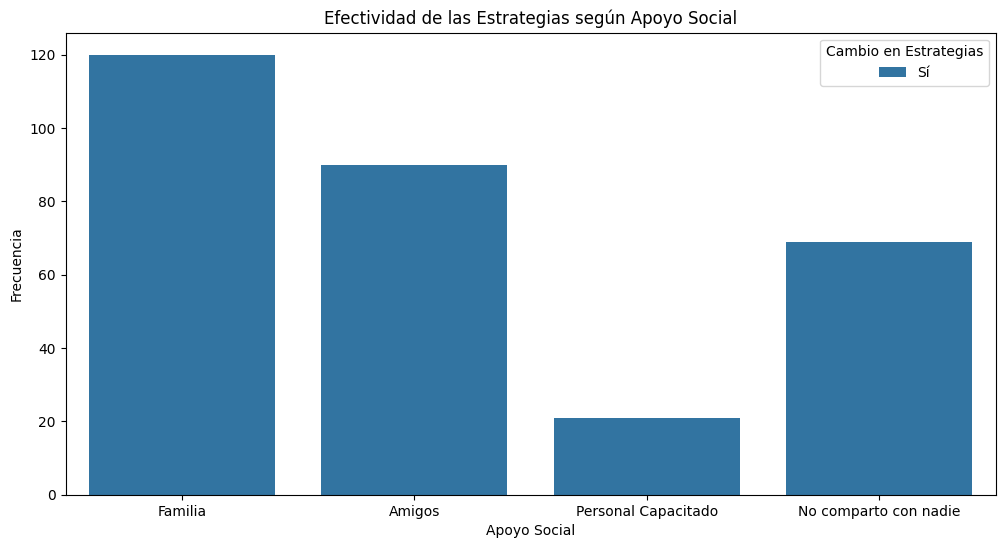

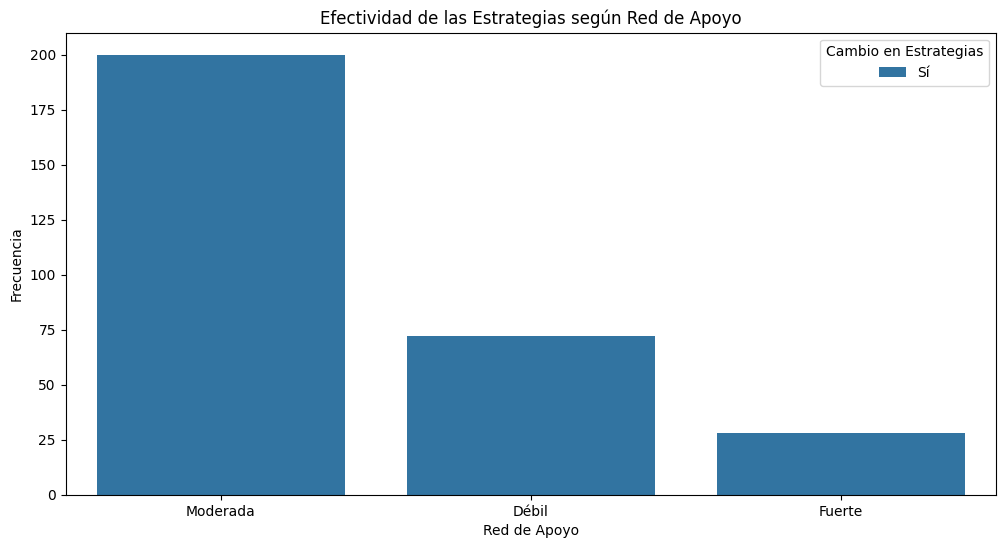

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Efectividad de las estrategias según 'Apoyo social'
plt.figure(figsize=(12, 6))
sns.countplot(data=df_estres, x='Apoyo social', hue='Cambio en estrategias')
plt.title('Efectividad de las Estrategias según Apoyo Social')
plt.xlabel('Apoyo Social')
plt.ylabel('Frecuencia')
plt.legend(title='Cambio en Estrategias')
plt.show()

# Efectividad de las estrategias según 'Red de apoyo'
plt.figure(figsize=(12, 6))
sns.countplot(data=df_estres, x='Red de apoyo', hue='Cambio en estrategias')
plt.title('Efectividad de las Estrategias según Red de Apoyo')
plt.xlabel('Red de Apoyo')
plt.ylabel('Frecuencia')
plt.legend(title='Cambio en Estrategias')
plt.show()


Categorías con menos de 2 ejemplos:
Series([], Name: count, dtype: int64)
Fitting 10 folds for each of 72 candidates, totalling 720 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


Model 3 - Training Set Evaluation
Confusion Matrix:
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 11  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 21  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  5  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 22  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0  3  0  0  0  0  0  0 27  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 25  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 14  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  5  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 59  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 11  0  0]]

Classification Report:
                  precision    recall  f1-score   support

        Deportes       0.00      0.00      0.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

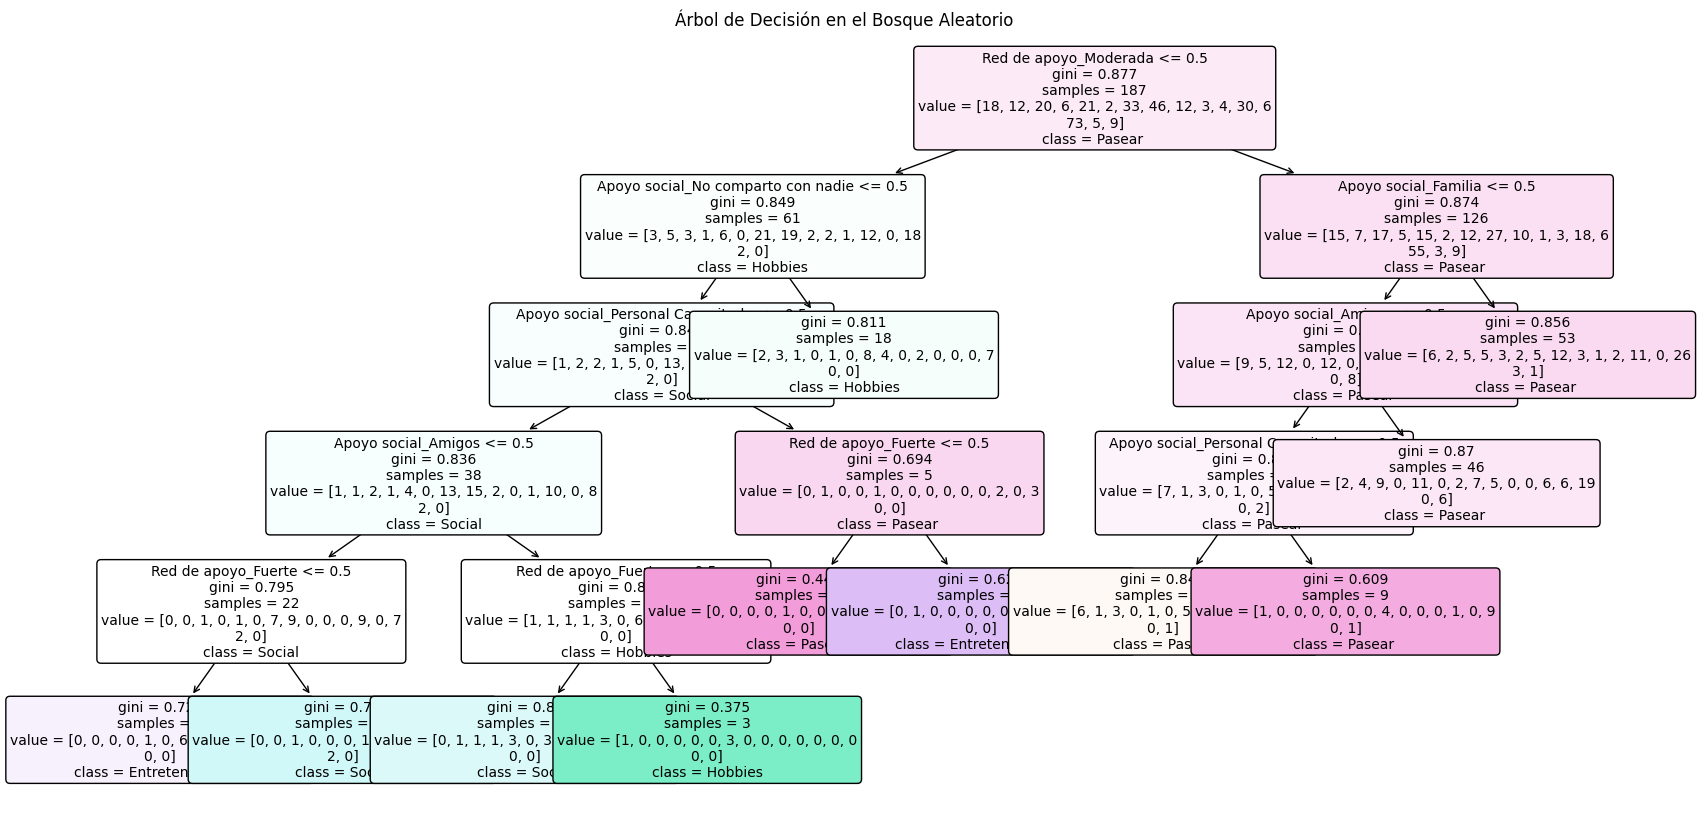

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Definir las variables independientes para el tercer modelo
X3 = df_estres[['Apoyo social', 'Red de apoyo', 'Cambio en estrategias']]

# Variable dependiente para el tercer modelo
y3 = df_estres['Estrategias de afrontamiento']

# Verificar la distribución de la variable objetivo
y3_distribution = y3.value_counts()

# Imprimir categorías con menos de 2 ejemplos
print("Categorías con menos de 2 ejemplos:")
print(y3_distribution[y3_distribution < 2])

# Si alguna categoría tiene menos de 2 ejemplos, no usamos 'stratify'
use_stratify = all(y3_distribution >= 2)

# Definir el preprocesador para las variables categóricas
categorical_features = ['Apoyo social', 'Red de apoyo', 'Cambio en estrategias']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

# Crear el pipeline con el preprocesador y el modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Definir la búsqueda de hiperparámetros para el pipeline
param_grid3 = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Configurar la búsqueda de hiperparámetros con GridSearchCV y Stratified k-Fold Cross-Validation
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid_search3 = GridSearchCV(estimator=pipeline, param_grid=param_grid3, cv=stratified_kfold, n_jobs=-1, verbose=2)
grid_search3.fit(X3, y3)

# Evaluar el modelo en el conjunto de validación
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42, stratify=y3 if use_stratify else None)

# Usar el mejor estimador para predicciones
best_model = grid_search3.best_estimator_

# Validación
y3_val_pred = best_model.predict(X3_train)
print("Model 3 - Training Set Evaluation")
print("Confusion Matrix:")
print(confusion_matrix(y3_train, y3_val_pred))
print("\nClassification Report:")
print(classification_report(y3_train, y3_val_pred))

# Evaluación en el conjunto de prueba
y3_test_pred = best_model.predict(X3_test)
print("Model 3 - Test Set Evaluation")
print("Confusion Matrix:")
print(confusion_matrix(y3_test, y3_test_pred))
print("\nClassification Report:")
print(classification_report(y3_test, y3_test_pred))

# Visualizar uno de los árboles del bosque
plt.figure(figsize=(20, 10))
feature_names = best_model.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_features)
plot_tree(best_model.named_steps['classifier'].estimators_[0], feature_names=feature_names, class_names=y3.unique().astype(str), filled=True, rounded=True, fontsize=10)
plt.title("Árbol de Decisión en el Bosque Aleatorio")
plt.show()
